## part 0 : Imports 

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, confusion_matrix, mean_squared_error, r2_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve
from sklearn.model_selection import learning_curve
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from mlxtend.plotting import plot_decision_regions
import missingno as msno
import dtreeviz
import pickle

## part 1 : Data Exploration  

In [2]:
df = pd.read_csv('data/train_diabetes_health_indicators.csv')
df['Diabetes_012'] = df['Diabetes_012'].astype(int)

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,...,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000
mean,0.305800,0.419325,0.401980,0.964337,28.939081,0.408114,0.038265,0.085752,0.781284,0.619807,...,0.962899,0.062696,2.473560,3.929245,3.761126,0.152720,0.476986,7.887829,5.142482,6.931191
std,0.703757,0.493454,0.490303,0.185450,6.562661,0.491490,0.191837,0.280000,0.413380,0.485439,...,0.189012,0.242417,1.027017,7.861948,8.239428,0.359721,0.499475,3.227736,0.945945,2.376979
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,2.000000,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47276 entries, 0 to 47275
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          47276 non-null  int32  
 1   HighBP                47276 non-null  int64  
 2   HighChol              47276 non-null  float64
 3   CholCheck             47276 non-null  int64  
 4   BMI                   47276 non-null  float64
 5   Smoker                47276 non-null  float64
 6   Stroke                47276 non-null  float64
 7   HeartDiseaseorAttack  47276 non-null  float64
 8   PhysActivity          47276 non-null  int64  
 9   Fruits                47276 non-null  int64  
 10  Veggies               47276 non-null  int64  
 11  HvyAlcoholConsump     47276 non-null  int64  
 12  AnyHealthcare         47276 non-null  int64  
 13  NoDocbcCost           47276 non-null  float64
 14  GenHlth               47276 non-null  float64
 15  MentHlth           

In [7]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,2,1,1.0,1,32.0,1.0,0.0,1.0,1,1,...,1,0.0,2.0,15.0,0.0,0.0,1,7,6.0,6.0
1,0,0,1.0,1,28.0,0.0,0.0,0.0,0,0,...,1,0.0,4.0,4.0,30.0,0.0,0,10,6.0,7.0
2,0,0,1.0,1,24.0,1.0,0.0,0.0,1,0,...,1,0.0,2.0,0.0,0.0,0.0,0,12,5.0,6.0
3,2,1,1.0,1,38.0,0.0,0.0,0.0,1,0,...,1,0.0,3.0,0.0,0.0,0.0,1,7,6.0,8.0
4,0,0,1.0,1,30.0,0.0,0.0,0.0,0,0,...,0,1.0,4.0,10.0,0.0,0.0,0,5,3.0,7.0


In [8]:
df.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     74
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                30
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                  11
dtype: int64

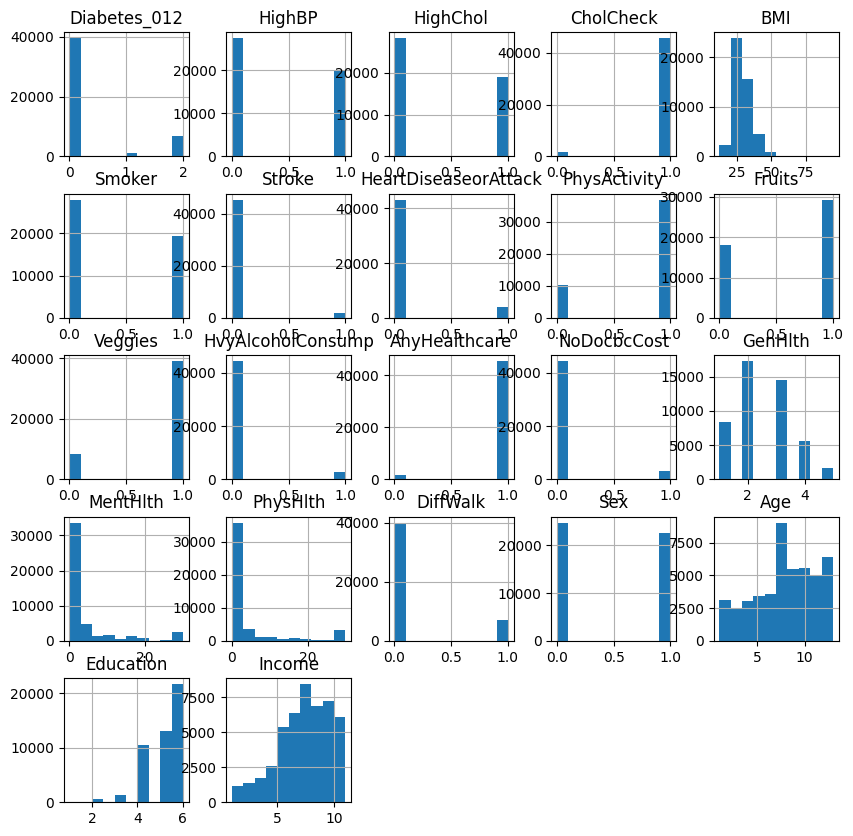

In [9]:
df.hist(figsize=(10,10))
plt.show()

### Correlation matrix 

<Axes: >

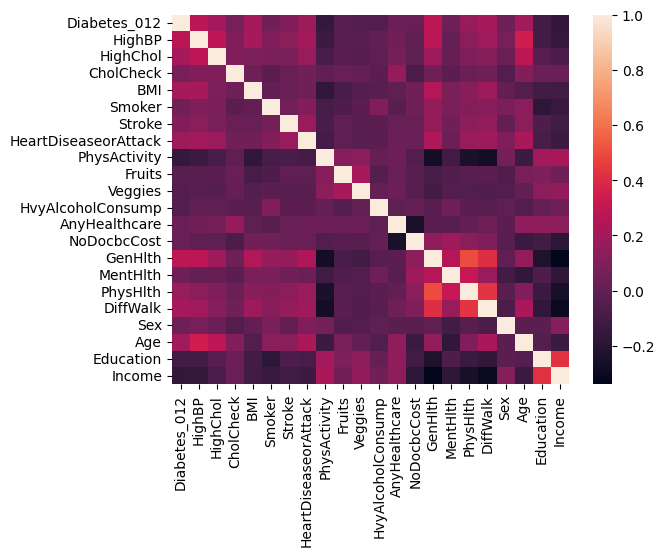

In [10]:
corr = df.corr()
sns.heatmap(corr)

## Part 4 : Training 

### Preparing data 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Diabetes_012', axis=1), df['Diabetes_012'], test_size=0.2)


### Preparing gridsearch

In [13]:
param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}
grid_gb = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [50, 100, 200]})

In [42]:
best_model = grid_gb.best_estimator_

### Model comparaison

### Viz pour les modele 

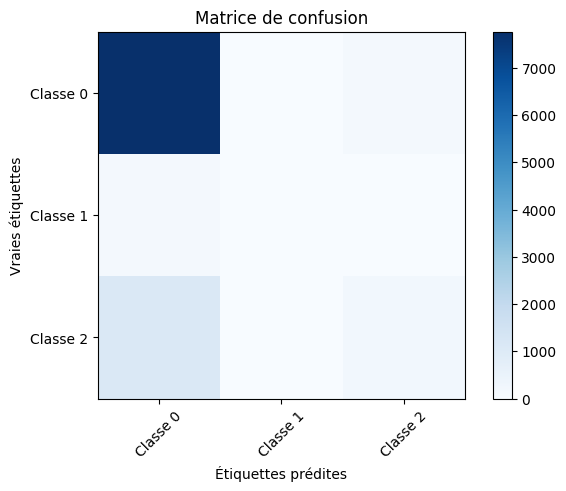

In [47]:

cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.colorbar()
tick_marks = np.arange(3)  # nbr de classes is 3
plt.xticks(tick_marks, ['Classe 0', 'Classe 1', 'Classe 2'], rotation=45)
plt.yticks(tick_marks, ['Classe 0', 'Classe 1', 'Classe 2'])
plt.tight_layout()
plt.ylabel('Vraies étiquettes')
plt.xlabel('Étiquettes prédites')
plt.show()


In [50]:
best_model

GradientBoostingClassifier(n_estimators=50)

In [56]:
pickle.dump(best_model, open("classification_model_GBC.pkl", "wb"))